In [3]:
# tail recursion - no stack overflow

def fact(num, accum=1):
    if num == 1:
        return accum
    return fact(num-1, accum * num)  # tail recursion: no statement after recursive call: function deleted from call stack

fact(8)

40320

In [2]:
import math

a = math.sqrt(2)
a**((a**a)**a)

2.0000000000000004

In [46]:
import PyPDF2
import os
import re

MY_PATH = r'C:\Users\bscho\Desktop\Orladeyo Mailing Jun23'
os.chdir(MY_PATH)

pdffileobject = open('EAACI 2022 - APeX-2 150 mg poster_final_6.15.22(1).pdf', 'rb')
pdfreader = PyPDF2.PdfFileReader(pdffileobject)
pageobj = pdfreader.getPage(0)
fulltext = pageobj.extractText()

refpattern = r'Reference'
#print(re.match(refpattern, fulltext, re.IGNORECASE))
refbegin = fulltext.find(refpattern)
reftext = fulltext[refbegin:refbegin+1000]  # todo: how to find the end?

refpattern = r' \d\.'
print(re.findall(refpattern, reftext))
print(re.split(refpattern, reftext))

# https://stackoverflow.com/questions/63632861/python-regex-to-get-citations-in-a-paper
author = r"(?:[A-Z][A-Za-z'`-]+)"
etal = r"(?:et al\.?)"
additional = f"(?:,? (?:(?:and |& )?{author}|{etal}))"
year_num = "(?:19|20)[0-9][0-9]"
page_num = "(?:, p\.? [0-9]+)?"  # Always optional
year = fr"(?:, *{year_num}{page_num}| *\({year_num}{page_num}\))"
regex = fr'\b(?!(?:Although|Also)\b){author}{additional}*{year}'
matches = re.findall(regex, reftext)

#print(matches)
# https://stackoverflow.com/questions/56317078/regex-for-capturing-scientific-citations
print(re.findall(r'\([^()\d]*\d[^()]*\)', reftext))

# https://stackoverflow.com/questions/49571999/regex-for-getting-the-title-and-the-author-from-reference-list
#print(re.findall(r'\(\'(\d+)\'\,\s\'(.*?\“|.*?\:)(.*?\”|.*?\.)(.*?\')\)', reftext))

[' 1.', ' 2.', ' 3.', ' 4.', ' 5.', ' 6.']
['References:', 'Farkas H. Expert Opin Ther Targets . 2019;23:457-459. ', 'Ghazi A, Grant JA. Biologics. 2013;7:103-113. ', 'Maurer M, et al. World Allergy Organ J . 2022;15:100627. ', 'Kiani S, et al. Oral presentation; Presented virtually at EAACI Annual Meeting; 2021.', ' . Gower R, et al. Poster presentation. Presented at The American Academy of Allergy, Asthma & Immunology; 2022.', ' Weller K, et al. Allergy. 2013;68:1185–1192. Teresa Caballero,1 Delphine Gobert,2 Bhavisha Desai,3Dianne Tomita,3Phil Collis,3Bob Geng4 on behalf of the APeX-2 Investigators \n1Allergy Department, La Paz University Hospital, IdiPAZ, CIBERER U754, Madrid, Spain;2Sorbonne université, Saint Antoine UniversityHospital, Paris, France 3BioCryst Pharmaceuticals, Inc, Durham, NC, United States;4 University of California, San Diego, La Jolla CA, United States\n≥Week 96Randomized 1:1:1\nProspective run-in period to establish baseline HAE attack rate(Day 14-70)\nBerotra

In [45]:
# https://github.com/PacktPublishing/Transformers-for-Natural-Language-Processing
# https://github.com/nlp-with-transformers/notebooks

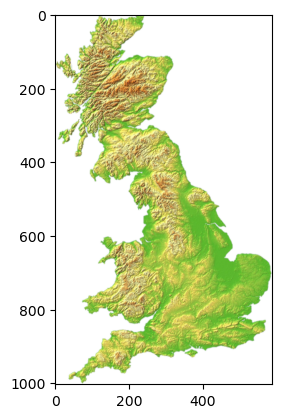

In [14]:
import matplotlib.pyplot as plt
import os

MY_PATH = r'C:\Users\bscho\Desktop'
os.chdir(MY_PATH)

img = plt.imread('GBmapsimple1.bmp')
imgplot = plt.imshow(img)
plt.show()

In [15]:
img[773][200:230]

array([[177, 173,  88],
       [168, 164,  74],
       [195, 191, 106],
       [170, 165,  86],
       [165, 159,  77],
       [168, 161,  79],
       [140, 132,  51],
       [160, 151,  68],
       [155, 146,  62],
       [188, 178,  92],
       [225, 217, 130],
       [179, 170,  78],
       [181, 169,  74],
       [164, 152,  48],
       [201, 189,  82],
       [214, 203,  97],
       [174, 162,  64],
       [226, 216, 127],
       [248, 239, 158],
       [171, 160,  77],
       [181, 169,  81],
       [231, 212, 116],
       [212, 194,  88],
       [244, 235, 120],
       [252, 247, 133],
       [252, 247, 148],
       [251, 246, 166],
       [219, 213, 145],
       [188, 180, 117],
       [224, 207, 133]], dtype=uint8)

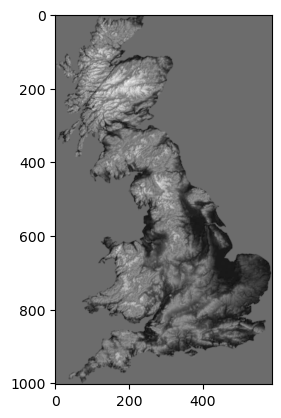

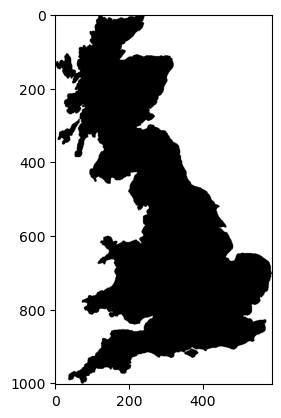

In [67]:
# transform to simple height
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    #return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return np.dot(rgb[...,:3], [0.5, -0.6, 0.0])

def rgb2mask(rgb):
    filter_arr = []
    # go through each element in arr
    for row in rgb:
        filter_row = []
        for element in row:
            if element[0] == 255 and element[1] == 255 and element[2] == 255:
                filter_row.append(1)
            else:
                filter_row.append(0)
        filter_arr.append(filter_row)
    return filter_arr

#img = mpimg.imread('image.png')     
gray = rgb2gray(img)
gray *= (1.0/(gray.max() - gray.min()))
gray -= gray.min()
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

plt.imshow(rgb2mask(img), cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [36]:
print(np.max(gray), np.min(gray))

0.9999999999999999 0.0


In [39]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.util import compare_images


image = gray
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'skimage'